In [1]:
#TODO
# - fazer analise com funções quadraticas simples
# - fazer analise com funções quadraticas criadas aleatoriamente
#     - criar função para gerar quadraticas convexas e nao convexas aleatoriamente (strongly convex é facil)
# - fazer calculo do gradiente da softmax
# - 

# Bibliotecas a serem usados no projeto

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

# Parte 1: gradiente descendente em funções quadráticas

Ao implementar um algoritmo de descida de gradiente, podemos escolher dentre diversos métodos para escolha do tamanho do passo a ser dado. Aqui, exploraremos dois deles: short-step e busca em linha exata.

## Preparação das funções quadráticas

Sabemos que para funções diferenciáveis, uma possível definição de convexidade forte é se a função pode ser cotada inferiormente por uma quadrática de coefficiente $m>0$. Em outras palavras, temos:

$$f(y) \geq f(x)+\nabla f(x)^T(y-x)+\frac{m}{2}\|y-x\|^2 \hspace{10pt} \forall x,y \in \text{Dom}(f)$$

Além disso, se a função é duplamente continuamente diferenciável - o que seria o caso neste exercício, já que lidamos apenas com quadráticas - uma outra maneira de caracterizar convexidade forte é pela propriedade

$$ \nabla^2 f(x) \succeq mI  \implies Q - mI \succeq 0. $$

Logo, teremos que definir $Q$ de tal modo que possua paenas autovalores positivos para os casos fortemente convexos, e pelo menos um autovalor nulo para o caso convexo. A função não convexa por sua vez possuirá pelo menos um autovalor negativo.

In [3]:
def BuildQuadratic(n:int=2, convexity:str='stronglyConvex', seed:int=0):

    Q = np.zeros((n,n))
    b = np.zeros(n)



    match convexity:
        case 'stronglyConvex':
            pass
        case 'convex':
            pass
        case 'nonConvex':
            pass


def StronglyConvexQuadratic(x:np.array):

    Q = np.array([[2, 1],[1, 3]])
    Q = Q.T @ Q

    b = np.array([0,0])

    c = 0

    return x.T @ Q @ x + b.T @ x + c

def ConvexQuadratic(x:np.array):

    Q = np.array([[2, 1],[8, 4]])

    b = np.array([0,0])

    c = 0

    return x.T @ Q @ x + b.T @ x + c

def NonConvexQuadratic(x:np.array):

    Q = np.array([[2, 1],[8, 4]])

    b = np.array([0,0])

    c = 0

    return x.T @ Q @ x + b.T @ x + c

def discretizedFunction(x0:np.ndarray, x1:np.ndarray, function:callable):
    functionValues = np.zeros((x0.size, x1.size))
    for i in range(x0.size):
        for j in range(x1.size):
            functionValues[j, i] = function(np.array([x0[i], x1[j]]))
    return functionValues

In [4]:

# Preparando função fortemente convexa
Q = np.array([[20, 1],[1, 3]])
Q = Q.T @ Q
b = np.array([0,0])
c = 0

stronglyConvex = lambda x: x.T @ Q @ x + b.T @ x + c
stronglyConvexGradient = lambda x: Q @ x + b

# Calculando constante de Lipschitz  
eigValues, eigvectors = np.linalg.eig(Q)
print(eigValues)
lipschitzL = np.max(eigValues)
stepSize = 1/lipschitzL


# Preparando parametros para rodar gradiente descendente
objective = stronglyConvex
objectiveGradient = stronglyConvexGradient
maxSteps = 1000
iter = 1
gradientNormStop = 1e-3
initialPoint = np.array([1,1])

# Iteração zero do algoritmo
point = initialPoint
gradient = objectiveGradient(point)
gradientNorm = np.linalg.norm(gradient)
objectiveValue = objective(point)

while iter < maxSteps and gradientNorm > gradientNormStop:

    point = point - stepSize*gradient
    gradient = objectiveGradient(point)
    gradientNorm = np.linalg.norm(gradient)
 
    iter = iter + 1

    if(iter%100 == 0):
        print(iter)

print(point, objective(point), gradientNorm)


[402.34829184   8.65170816]
100
200
300
400
[-6.64532934e-06  1.13360157e-04] 1.1156105703479268e-07 0.0009824427248335983


In [5]:
samples = 100
conditionNumbers = []
finalGradientNorms = []
finalObjectiveValues = []
iterations = []

for q11 in range(4, 4+samples):    
    # Preparando função fortemente convexa
    Q = np.array([[q11, 1],[1, 3]])
    Q = Q.T @ Q
    b = np.array([0,0])
    c = 0

    stronglyConvex = lambda x: x.T @ Q @ x + b.T @ x + c
    stronglyConvexGradient = lambda x: Q @ x + b

    # Calculando constante de Lipschitz  
    eigValues, eigvectors = np.linalg.eig(Q)
    maxEig = np.max(eigValues)
    minEig = np.min(eigValues)
    stepSize = 1/maxEig


    # Preparando parametros para rodar gradiente descendente
    objective = stronglyConvex
    objectiveGradient = stronglyConvexGradient
    maxSteps = 100
    iter = 1
    gradientNormStop = 1e-3
    initialPoint = np.array([1,1])

    # Iteração zero do algoritmo
    point = initialPoint
    gradient = objectiveGradient(point)
    gradientNorm = np.linalg.norm(gradient)
    objectiveValue = objective(point)

    while iter < maxSteps and gradientNorm > gradientNormStop:

        point = point - stepSize*gradient
        gradient = objectiveGradient(point)
        gradientNorm = np.linalg.norm(gradient)
    
        iter = iter + 1

    conditionNumbers.append(maxEig/minEig)
    finalGradientNorms.append(gradientNorm)
    finalObjectiveValues.append(objective(point))
    iterations.append(iter)

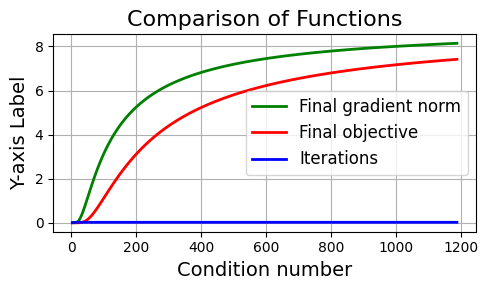

In [6]:
x = range(1, samples+1)

plt.figure(figsize=(5, 3))
# plt.plot(x, conditionNumbers, label='sin(x)', color='blue', linewidth=2)
plt.plot(conditionNumbers, finalGradientNorms, label='Final gradient norm', color='green', linewidth=2)
plt.plot(conditionNumbers, finalObjectiveValues, label='Final objective', color='red', linewidth=2)
plt.plot(conditionNumbers, [i/5000 for i in iterations], label='Iterations', color='blue', linewidth=2)

plt.title('Comparison of Functions', fontsize=16)
plt.xlabel('Condition number', fontsize=14)
plt.ylabel('Y-axis Label', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
print(iterations)

[26, 33, 43, 56, 71, 89, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]


In [20]:
def generatePSDMatrix():
    # Step 1: Choose non-negative eigenvalues
    eigenvalues = np.array([5, 0])  # Example: lambda1 = 1, lambda2 = 0
    
    # Step 2: Generate a random orthonormal eigenvector matrix
    V = np.linalg.qr(np.random.randn(2, 2))[0]  # QR decomposition gives orthonormal matrix
    
    # Step 3: Compute Q = V Λ V^T
    Q = V @ np.diag(eigenvalues) @ V.T
    return Q

Q = generatePSDMatrix()
eigValues, eigvectors = np.linalg.eig(Q)
print(Q)
print(eigValues)

[[4.78381278 1.01695584]
 [1.01695584 0.21618722]]
[5.00000000e+00 2.77555756e-17]


## Plot e análises das funções

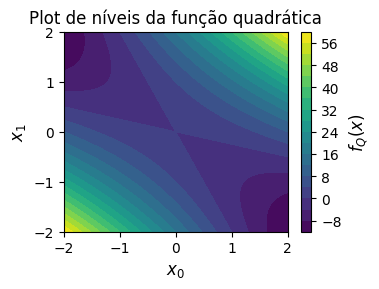

In [9]:
# Calculando valores das funções 
x0 = np.linspace(-2, 2, 1000)
x1 = np.linspace(-2, 2, 1000)

functionValuesQ = discretizedFunction(x0, x1, ConvexQuadratic)

# Criando plot
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))

# Plot da função quadrática
contour1 = ax1.contourf(x0, x1, functionValuesQ, levels=20, cmap='viridis')
colorBar1 = fig.colorbar(contour1, ax=ax1)
colorBar1.set_label(label='$f_Q(x)$', fontsize=12)
ax1.set_xlabel('$x_0$', fontsize=12)
ax1.set_ylabel('$x_1$', fontsize=12)
ax1.set_title('Plot de níveis da função quadrática', fontsize=12)
ax1.axis('tight')


plt.tight_layout()
plt.show()

## Gradiente descendente com busca em linha exata

## Gradiente descendente com short-step

# Parte 2: classificação multinomial no dataset MNIST

## Cáculo do gradiente da função objetivo softmax

A função custo para a regressão logística multinomial é dada por

$$ J(\theta) = -\left[ \sum_{i=1}^{m}\sum_{k=1}^{K} \delta(y^i=k) \log \left( \frac{\exp ({\theta^k}^Tx^i)}{\sum_{j=1}^{K}\exp({\theta^j}^Tx^i)} \right) \right], $$


e seu gradiente por sua vez é

$$ \nabla_{\theta^k}J(\theta) = -\sum_{i=1}^{m} \left[ x^i (\delta (y^i=k) - \frac{\exp ({\theta^k}^Tx^i)}{\sum_{j=1}^{K}\exp({\theta^j}^Tx^i)} ) \right] $$ 


## Carregando base de dados MNIST e preparando conjuntos de treino/teste

In [10]:
# Load the MNIST dataset
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Convertendo matrizes de pixels em uma lista 
x_train = np.array([array.reshape(-1) for array in x_train])
x_test = np.array([array.reshape(-1) for array in x_test])

# One-hot enconding para a classificação de cada dado
y_train = np.eye(10, dtype=int)[y_train]
y_test = np.eye(10, dtype=int)[y_test]


# Normalize the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
N = len(x_train)
K = 10
d = len(x_train[0])
learningRate = 0.5

points = np.random.random_sample((K, d))

# Preparando parametros para rodar gradiente descendente
maxSteps = 10
iter = 1
gradientNormStop = 1e-3

while iter < maxSteps:

    exponentials = np.zeros(K)
    softmaxTerms = np.zeros(K)
    gradient = np.zeros((K,d))
    
    for dataPointIndex in range(N):
        
        # Prepara o discriminante do ponto atual para cada classe do problema
        # for categoryIndex in range(K):
        #     normalizationCoeffs[categoryIndex] = normalizationCoeffs[categoryIndex] + points @ x_train[dataPointIndex]
        
        exponentials = points @ x_train[dataPointIndex]
        
        # Prepara termos da softmax
        for categoryIndex in range(K):
            softmaxTerms[categoryIndex] = np.exp(exponentials[categoryIndex]) / np.sum(exponentials)
        pass
        # Cálculo do gradiente
        for categoryIndex in range(K):
            gradient[categoryIndex] = (y_train[dataPointIndex][categoryIndex] - softmaxTerms[categoryIndex])* x_train[dataPointIndex]
    
        points = points + learningRate * gradient
    
    
    iter = iter + 1
    print(iter)




2
3
4
5
6
7
8
9
10


In [17]:
print(points @ x_train[0])


[-5.37658215e+23 -2.25205087e+22 -2.08803175e+23 -3.40957449e+23
 -2.73701976e+22 -1.55401041e+23 -3.29718353e+21 -6.42316887e+23
 -1.31714396e+21 -3.36452009e+21]


In [ ]:
print(type(x_train))
print(x_train.shape)

print(type(x_train[0]))
print(x_train[0].shape)

print(type(y_train))
print(y_train.shape)

print(type(y_train[0]))
print(y_train[0].shape)


<class 'numpy.ndarray'>
(60000, 784)
<class 'numpy.ndarray'>
(784,)
<class 'numpy.ndarray'>
(60000, 10)
<class 'numpy.ndarray'>
(10,)
[0 0 0 0 0 1 0 0 0 0]


In [ ]:
print(type(x_train))
print(x_train.shape)

print(type(x_train[0]))
print(x_train[0].shape)